In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[NiBabel](http://nipy.org/nibabel/) is a Python package for reading and writing neuroimaging data.

## Neuroimaging File Formats

|Format Name | File Extension | Origin |
|---|---|---|
| Analyze | .img/.hdr | Analyze software, Mayo Clinic |
| DICOM | none | ACR/NEMA consortium |
| NIfTI | .nii or .img/.hdr | NIH Neuroinformatics Tools Initiative |
| MINC | .mnc | Montreal Neurological Institute |
| AFNI brick | .BRIK | AFNI software, Medical College of Wisconsin/NIMH |

## Intro to NIfTI

From the MRI scanner, images are initially collected in the DICOM format and can be converted to NIfTI using [dcm2niix](https://github.com/rordenlab/dcm2niix).

NIfTI is one of the most common file formats for storing neuroimaging data. We'll cover a few details to get started working with the data contained in the NIfTI files (end in `.nii` or `.nii.gz`).

If you're interested in learning more about NIfTI images, we highly recommend [this blog post about the NIfTI format](http://brainder.org/2012/09/23/the-nifti-file-format/). For learning more about how they're handled by NiBabel, the [Working with NIfTI images](http://nipy.org/nibabel/nifti_images.html) page of the NiBabel documentation is a great resource.

## Reading NIfTI Images

First, we use the `load()` function to create a NiBabel image object from a NIfTI file. We'll use an example image from NiBabel.

In [2]:
from nibabel.testing import data_path

example_file = os.path.join(data_path, 'example4d.nii.gz')

img = nib.load(example_file)

There are three main components of a NIfTI image:

### 1. Header

[The header](http://nipy.org/nibabel/nibabel_images.html#the-image-header) contains metadata about the image, such as image dimensions, data type, and TR.

In [3]:
nii_hdr = img.header

Accessing specific metadata from the header is easy. They are accessible from the NiBabel image header object through dictionary keys.

In [4]:
nii_hdr.keys()

['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

In [5]:
nii_hdr['pixdim']

array([-1.000000e+00,  2.000000e+00,  2.000000e+00,  2.199999e+00,
        2.000000e+03,  1.000000e+00,  1.000000e+00,  1.000000e+00],
      dtype=float32)

### 2. Affine

The affine array tells the position of the image array data in a *reference space*. It translates between data-space and world-space. If you're not familiar with coordinates and image spaces, check out the [Coordinate systems and affines](http://nipy.org/nibabel/coordinate_systems.html) page of the NiBabel documentation.

In [6]:
nii_affine = img.affine
nii_affine

array([[-2.00000000e+00,  6.71471565e-19,  9.08102451e-18,
         1.17855103e+02],
       [-6.71471565e-19,  1.97371149e+00, -3.55528235e-01,
        -3.57229424e+01],
       [ 8.25548089e-18,  3.23207617e-01,  2.17108178e+00,
        -7.24879837e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [7]:
# go from voxel to mm
real_pt = nib.affines.apply_affine(nii_affine, [22, 34, 12])
real_pt

array([73.85510254, 27.1169095 , 29.79324198])

In [8]:
# go from mm to voxel
import numpy.linalg as npl
nib.affines.apply_affine(npl.inv(nii_affine), real_pt)

array([22., 34., 12.])

ADD MORE DETAIL!

### 3. Data

The data is a multidimensional array representing the image data. It always has at least 3 dimensions (X, Y, and Z) and sometimes T (time).

In [9]:
nii_data = img.get_data()

### Explore

Explore some of the other methods that can be called on the NIfTI image. Can you get the dimensions of the image? The data type?

In [10]:
img.get_data_dtype()

dtype('<i2')

The data type of an image controls the range of possible intensities. As the number of possible values increases, the size of the image also increases.

| Data Type | Range | Number of Values |
|---|---|---|
| uint8 | 0, 255 | 256 |
| uint16 | -128, 127 | 256 |
| uint 16 | 0, 2^16 | 2^16 |
| int16 | -2^15, 2^15 | 2^16 |
| float16 | ~-2^16, ~2^16 | >>2^16 |

In [11]:
img.shape

(128, 96, 24, 2)

The image has 4 dimensions: x, y, z and time.

## Working With Image Data

## Slicing

N-dimensional images are just stacks of numpy arrays.

In [12]:
nii_data[0]

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]], dtype=int16)

In [13]:
nii_data[1]

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]], dtype=int16)

## Reshaping

NiBabel has a `reshape()` function for reshaping the data array. Let's say we want to convert this 3D array into a a 2D n_voxels * n_volumes) array.

In [14]:
nii_data_2d = nii_data.reshape(np.prod(nii_data.shape[:-1]), nii_data.shape[-1])
nii_data_2d.shape

(294912, 2)

## Coordinate Systems

## Viewing Images

Matplotlib's `imshow()` function displays 2D image data. 

In [19]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice, cmap="gray", origin="lower")
        for ax in axes:
            ax.axis('off')

In [20]:
nii_data.shape

(128, 96, 24, 2)

Text(0.5, 0.98, 'Center slices for EPI image')

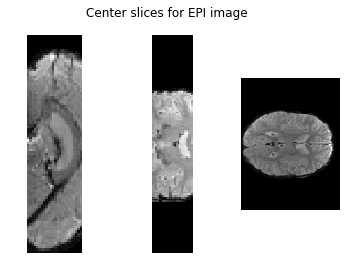

In [21]:
# view center slice
slice_0 = nii_data[63, :, :, 0]
slice_1 = nii_data[:, 47, :, 0]
slice_2 = nii_data[:, :, 11, 0]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")

In this example, 
- the x dimension is in the sagittal plane,
- the y dimension is in the coronal plane
- the z dimension is in the axial plane

Rotate the slices

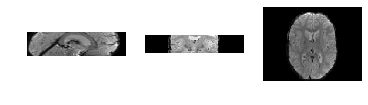

In [22]:
show_slices([slice_0.T, slice_1.T, slice_2.T])

## Masks

In [28]:
import scipy.ndimage as ndi

In [25]:
slice_3 = slice_2.T

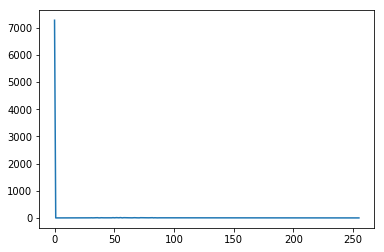

In [45]:
hist=ndi.histogram(slice_3, min=0, max=255, bins=256)
plt.plot(hist)
plt.show()

In [37]:
mask = slice_3 > 64

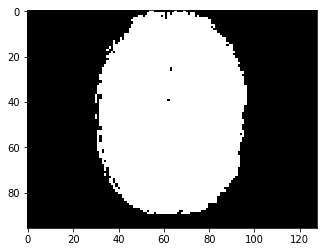

In [46]:
plt.imshow(mask, cmap = 'gray')

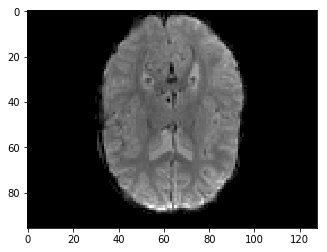

In [47]:
test = np.where(slice_3 > 80, slice_3, 0)
plt.imshow(test, cmap = 'gray')

## Writing NIfTI Images

In [ ]:
img_mask = nib.Nifti1Image(test, nii_affine, nii_hdr)

In [ ]:
img_mask.to_filename('')